In [2]:
import os

import numpy as np
import torch
from analysis_utils import *
from load_data_for_analysis import *

In [3]:
data_dir = "data/"

In [6]:
snareseq_barcodes, snareseq_peaks, gene_names = load_snare_data(os.path.join(data_dir, "snareseq"))
true_split = get_test_split_index(os.path.join(data_dir, "split"))
test_cell_names = get_celltype_annotations(
    os.path.join(data_dir, "diffexp"), snareseq_barcodes=snareseq_barcodes, true_split=true_split
)

diff_genes = load_diff_genes(os.path.join(data_dir, "diffexp"))
diff_genes_ind = get_diff_gene_ind(gene_names, diff_genes)

rna_counts, obs_rna = get_rna_counts(os.path.join(data_dir, "snareseq/"), true_split)
atac_counts, obs_atac = get_atac_counts(os.path.join(data_dir, "snareseq/"), true_split)

diff_peaks_ind = get_diff_peaks_ind(os.path.join(data_dir, "diffexp"), snareseq_peaks)

# Load predictions

In [8]:
data_dir = "/data/mikulik/mnt_polarbear_exp/"

In [10]:
atac_z = load_latent_embeddings(os.path.join(data_dir, "atacvae/settings_polarbear/"))
rna_z = load_latent_embeddings(os.path.join(data_dir, "rnavae/settings_polarbear"))

In [14]:
# RNAVAE predictions
mean_pred_rna, var_pred_rna = get_reconstructed_counts("/data/mikulik/mnt_polarbear_exp/rnavae/settings_polarbear")
mean_pred_rna, var_pred_rna = torch.from_numpy(np.asarray(mean_pred_rna)), torch.from_numpy(np.asarray(var_pred_rna))

# ATACVAE predictions
mean_pred_atac, var_pred_atac = get_reconstructed_counts("/data/mikulik/mnt_polarbear_exp/atacvae/settings_polarbear")
mean_pred_atac, var_pred_atac = (
    torch.from_numpy(np.asarray(mean_pred_atac)),
    torch.from_numpy(np.asarray(var_pred_atac)),
)

# MLP Trnaslator ATAC2RNA
mean_pred_mlp_rna, var_pred_mlp_rna = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/mlptranslator/settings_polarbear_atac2rna/"
)
# MLP Trnaslator SANE ATAC2RNA
mean_pred_mlp_rna_sane, var_pred_mlp_rna_sane = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/mlptranslator/settings_sane_atac2rna/"
)

# MLP Translator RNA2ATAC
mean_pred_mlp_atac, var_pred_mlp_atac = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/mlptranslator/settings_polarbear_rna2atac"
)
# print(mean_pred_mlp_atac.shape)

# Visualize UMAPs

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyt

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


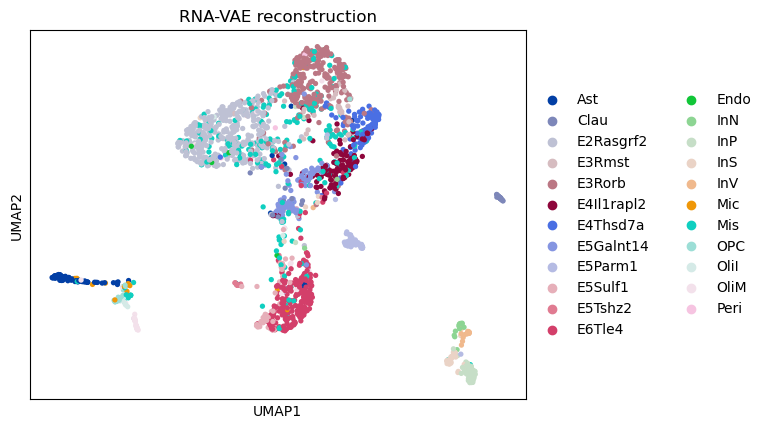

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


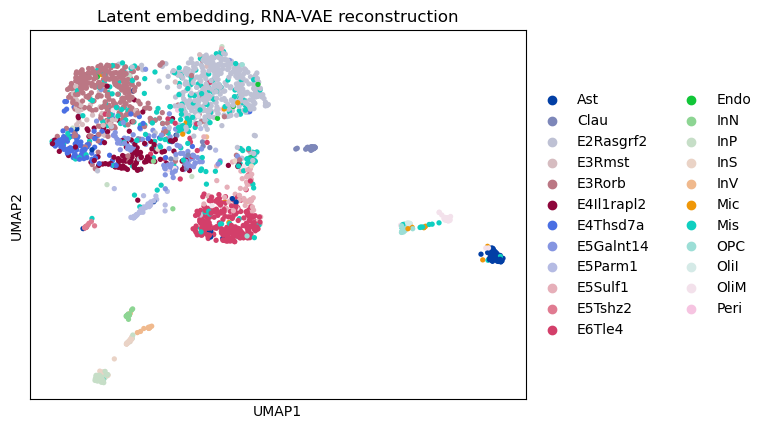

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


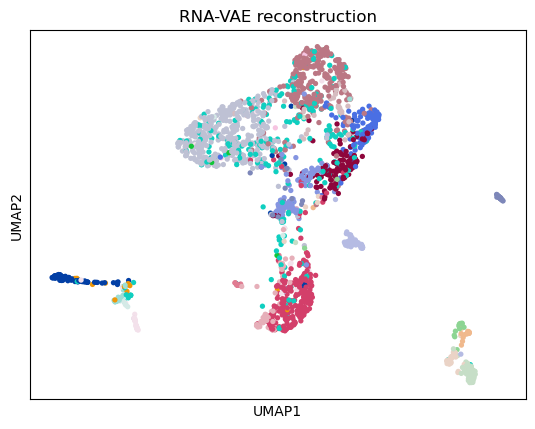

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


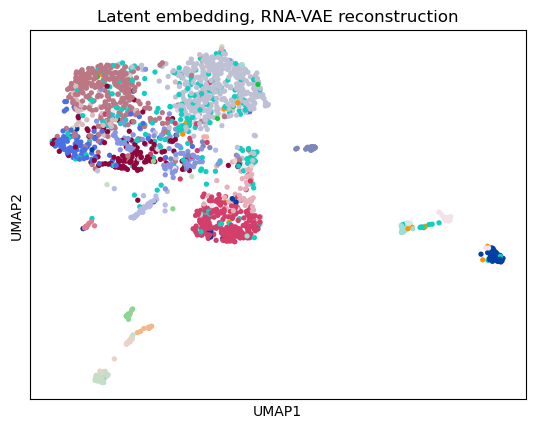

In [15]:
adata_tmp = scanpy_embedding(
    mean_pred_rna,
    test_cell_names,
    gene_names,
    title="RNA-VAE reconstruction",
    latent=rna_z,
    file_name="rnavae_pred",
    legend_loc="right margin",
)
adata_tmp = scanpy_embedding(
    mean_pred_rna,
    test_cell_names,
    gene_names,
    title="RNA-VAE reconstruction",
    latent=rna_z,
    file_name="rnavae_pred_no_legend",
)

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


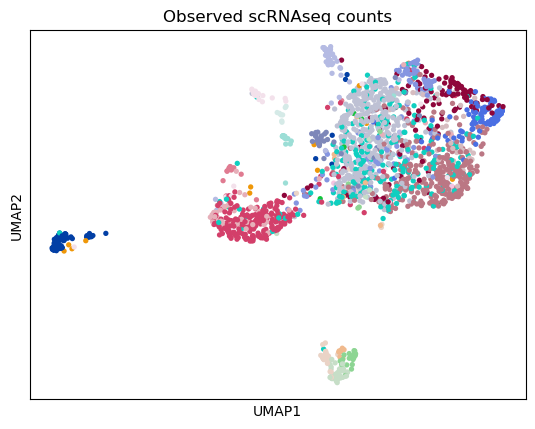

AnnData object with n_obs × n_vars = 2058 × 3114
    obs: 'Batch', 'Barcode', 'Ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene', 'ind', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Ident_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
# scanpy_embedding(mean_pred_rna, test_cell_names, gene_names, title="RNAVAE predictions")
scanpy_embedding(
    obs_rna, test_cell_names, gene_names, title="Observed scRNAseq counts", file_name="rna_obs", legend_loc=None
)

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


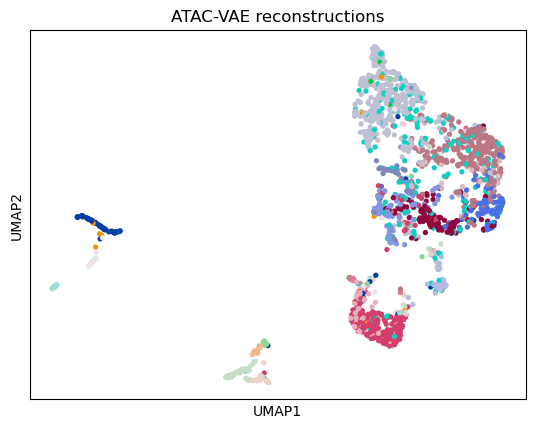

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


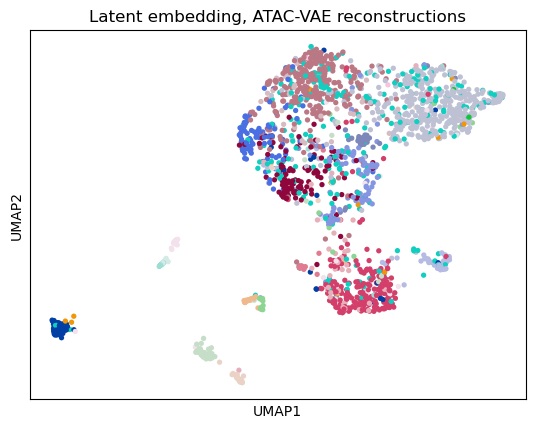

AnnData object with n_obs × n_vars = 2061 × 37931
    obs: 'Batch', 'Barcode', 'Ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'peaks', 'ind', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Ident_colors'
    obsm: 'latent_polar', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
scanpy_embedding(
    mean_pred_atac,
    test_cell_names,
    snareseq_peaks,
    title="ATAC-VAE reconstructions",
    latent=atac_z,
    file_name="atac_vae_pred_no_legend",
)

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


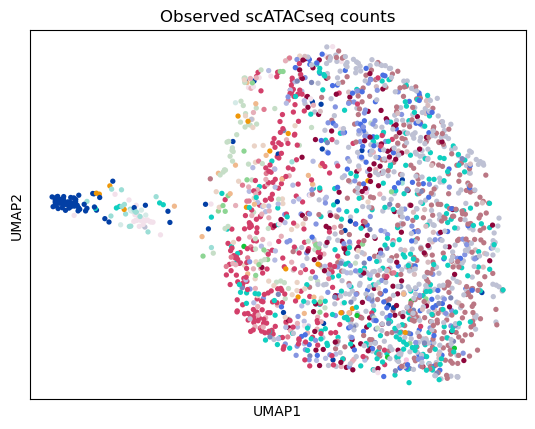

AnnData object with n_obs × n_vars = 2061 × 46868
    obs: 'Batch', 'Barcode', 'Ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'peaks', 'ind', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Ident_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [18]:
scanpy_embedding(
    obs_atac,
    test_cell_names,
    snareseq_peaks,
    title="Observed scATACseq counts",
    file_name="atac_obs",
)

# Correlation for differentially expressed genes

Compute Correlations just for the differentially expressed genes. 

### RNAVAE

In [19]:
obs_norm = normalize_counts(obs_rna)
mean_pred_rna, _ = get_reconstructed_counts("/data/mikulik/mnt_polarbear_exp/rnavae/settings_polarbear")
# Correlation per gene
corr_gene = corr_obs_reocnstr(
    x=obs_norm[:, diff_genes_ind.tolist()], y=mean_pred_rna[:, diff_genes_ind.tolist()], per_gene=True, data_type="RNA"
)
print(f"Mean correlation per gen: {corr_gene.mean()}")

# correlation per cell
corr_gene = corr_obs_reocnstr(
    x=obs_norm[:, diff_genes_ind.tolist()], y=mean_pred_rna[:, diff_genes_ind.tolist()], per_gene=False, data_type="RNA"
)
print(f"Mean correlation per cell: {corr_gene.mean()}")

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: The variance of predictions or target is close to zero. This can cause instability in Pearson correlationcoefficient, leading to wrong results. Consider re-scaling the input if possible or computing using alarger dtype (currently using torch.float32).
  warnings.warn(*args, **kwargs)  # noqa: B028


Mean correlation per gen: 0.14598122239112854
Mean correlation per cell: 0.7568413019180298


### Translator Networks

In [20]:
corr_gene_list, corr_cell_list = {}, {}
obs_norm = normalize_counts(obs_rna)
# cINN Translator
latent_inn, _ = get_reconstructed_cross_modality("/data/mikulik/mnt_polarbear_exp/inntranslator/latent_atac2rna_v1/")
sample_inn, _ = get_reconstructed_cross_modality("/data/mikulik/mnt_polarbear_exp/inntranslator/sample_atac2rna_v1/")
double_sample, _ = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/inntranslator/doublesample_atac2rna_v1"
)
# MLP Translator ATAC2RNA
mean_pred_mlp_rna, var_pred_mlp_rna = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/mlptranslator/settings_polarbear_atac2rna/"
)
# MLP Translator SANE ATAC2RNA
mean_pred_mlp_rna_sane, var_pred_mlp_rna_sane = get_reconstructed_cross_modality(
    "/data/mikulik/mnt_polarbear_exp/mlptranslator/settings_sane_atac2rna/"
)
for reconstruction, name in zip(
    [mean_pred_mlp_rna, mean_pred_mlp_rna_sane, latent_inn, sample_inn, double_sample],
    ["mlp_sample", "mlp_latent", "latent_inn", "sample_inn", "double_sample_inn"],
    strict=False,
):
    corr_gene = corr_obs_reocnstr(
        x=obs_norm[:, diff_genes_ind.tolist()],
        y=reconstruction[:, diff_genes_ind.tolist()],
        per_gene=True,
        data_type="RNA",
    )
    corr_gene_list[name] = corr_gene

    corr_cell = corr_obs_reocnstr(
        x=obs_norm[:, diff_genes_ind.tolist()],
        y=reconstruction[:, diff_genes_ind.tolist()],
        per_gene=False,
        data_type="RNA",
    )
    corr_cell_list[name] = corr_cell

In [23]:
save_figs = "figures/"

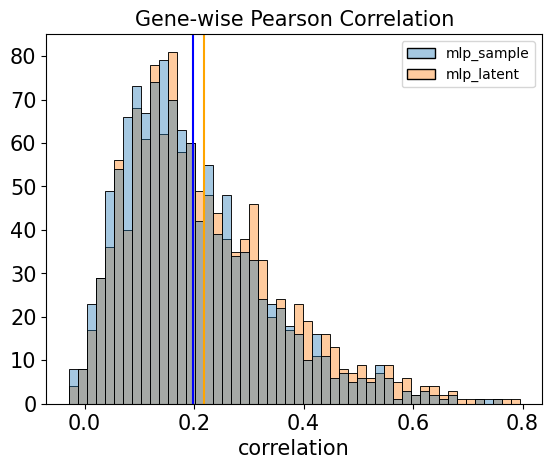

In [24]:
subset_dict = {key: value for key, value in corr_gene_list.items() if key in {"mlp_sample", "mlp_latent"}}
corr_histograms(
    subset_dict,
    labels=["MLP Sample", "MLP Latent"],
    alpha=0.4,
    colors=["blue", "orange"],
    bins=50,
    save_figs=save_figs,
    file_name="hist_corr_gene_mlp",
)

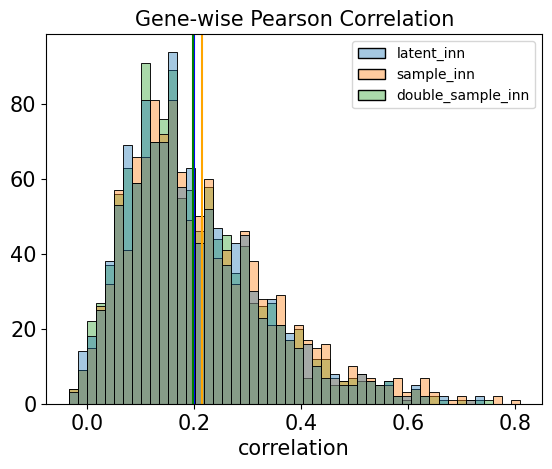

In [25]:
subset_dict = {key: value for key, value in corr_gene_list.items() if key not in {"mlp_sample", "mlp_latent"}}
corr_histograms(
    subset_dict,
    labels=["MLP Sample", "MLP Latent"],
    alpha=0.4,
    colors=["blue", "orange", "green"],
    bins=50,
    save_figs=save_figs,
    file_name="hist_corr_gene_cNF",
)

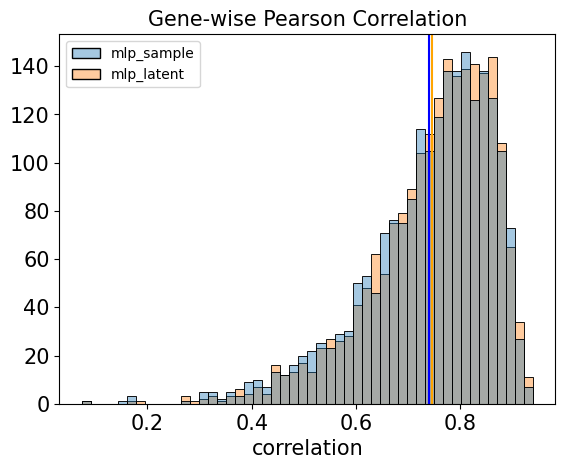

In [26]:
subset_dict = {key: value for key, value in corr_cell_list.items() if key in {"mlp_sample", "mlp_latent"}}
corr_histograms(
    subset_dict,
    labels=["MLP Sample", "MLP Latent"],
    alpha=0.4,
    colors=["blue", "orange"],
    bins=50,
    save_figs=save_figs,
    file_name="hist_corr_cell_mlp",
)

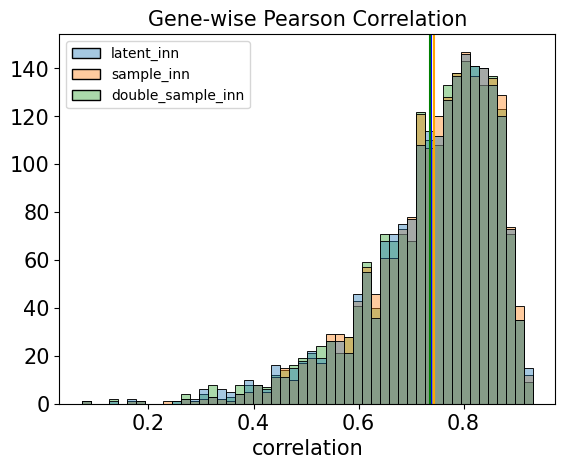

In [27]:
subset_dict = {key: value for key, value in corr_cell_list.items() if key not in {"mlp_sample", "mlp_latent"}}
corr_histograms(
    subset_dict,
    labels=["MLP Sample", "MLP Latent"],
    alpha=0.4,
    colors=["blue", "orange", "green"],
    bins=50,
    save_figs=save_figs,
    file_name="hist_corr_cell_cNF",
)

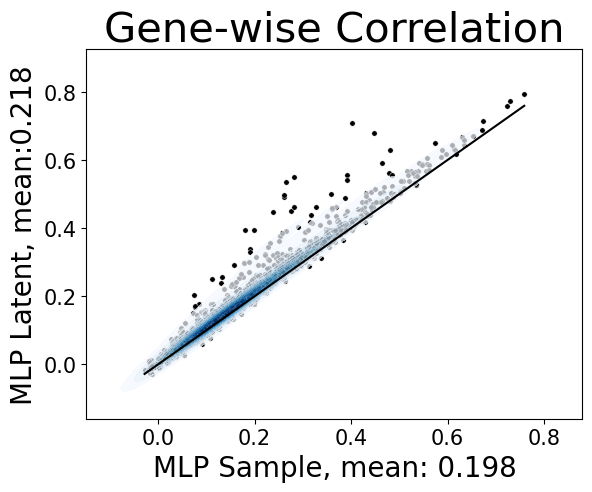

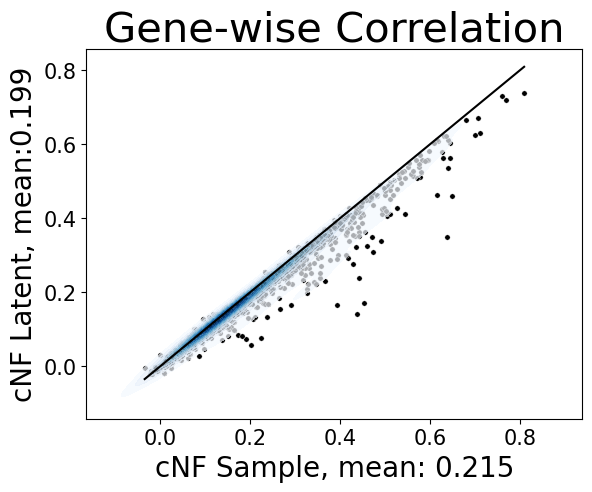

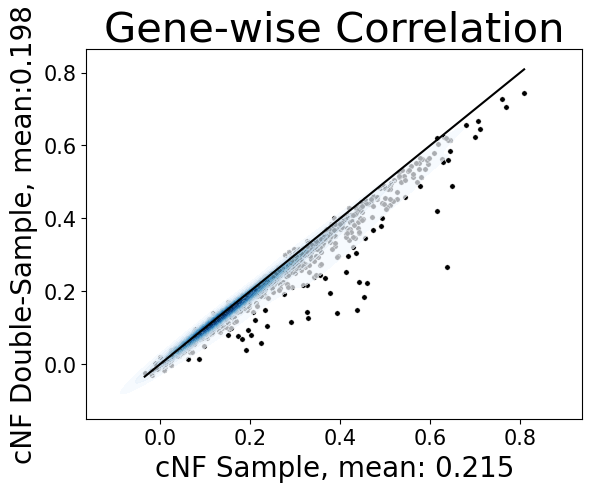

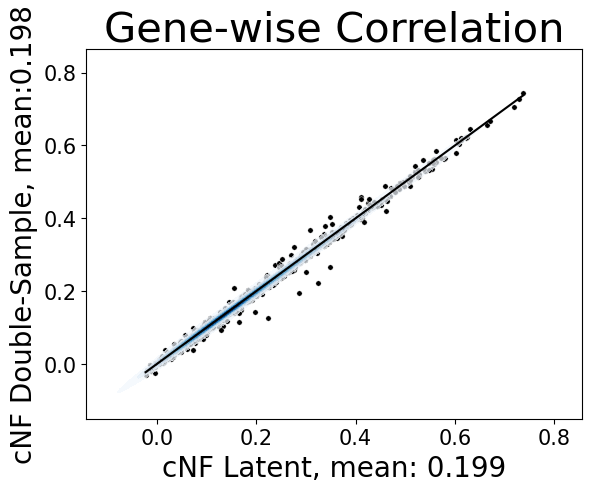

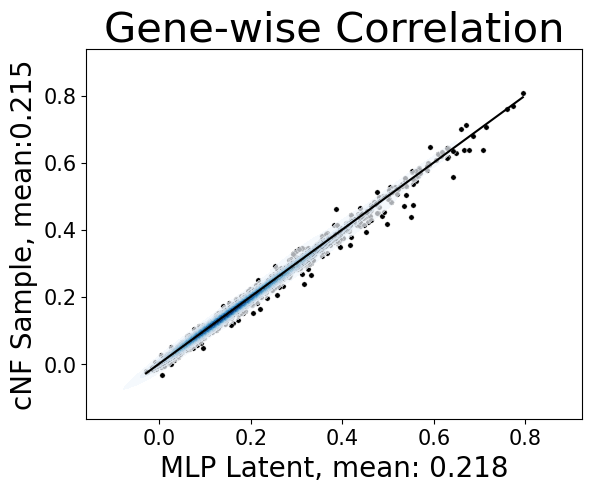

In [28]:
compare_correlations(
    x=corr_gene_list["mlp_sample"],
    y=corr_gene_list["mlp_latent"],
    title="Gene-wise Correlation",
    x_label="MLP Sample",
    y_label="MLP Latent",
    save_fig=save_figs,
    file_name="mlp_latent_sample.pdf",
)
compare_correlations(
    x=corr_gene_list["sample_inn"],
    y=corr_gene_list["latent_inn"],
    title="Gene-wise Correlation",
    x_label="cNF Sample",
    y_label="cNF Latent",
    save_fig=save_figs,
    file_name="cNF_latent_sample.pdf",
)
compare_correlations(
    x=corr_gene_list["sample_inn"],
    y=corr_gene_list["double_sample_inn"],
    title="Gene-wise Correlation",
    x_label="cNF Sample",
    y_label="cNF Double-Sample",
    save_fig=save_figs,
    file_name="cNF_sample_doublesample.pdf",
)
compare_correlations(
    x=corr_gene_list["latent_inn"],
    y=corr_gene_list["double_sample_inn"],
    title="Gene-wise Correlation",
    x_label="cNF Latent",
    y_label="cNF Double-Sample",
    save_fig=save_figs,
    file_name="cNF_latent_doublesample.pdf",
)

compare_correlations(
    x=corr_gene_list["mlp_latent"],
    y=corr_gene_list["sample_inn"],
    title="Gene-wise Correlation",
    x_label="MLP Latent",
    y_label="cNF Sample",
    save_fig=save_figs,
    file_name="mlp_latent_cNF_sample.pdf",
)

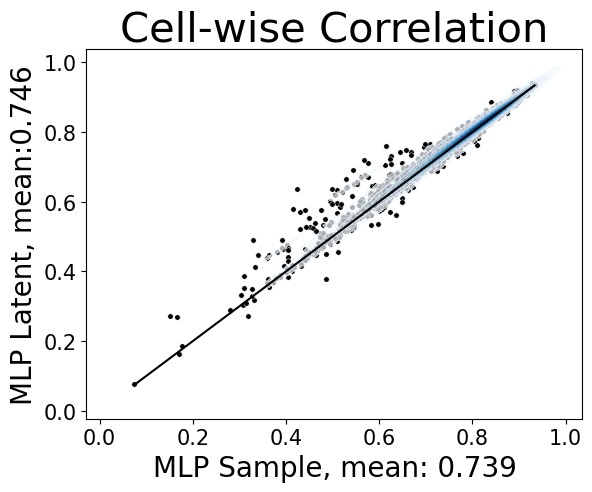

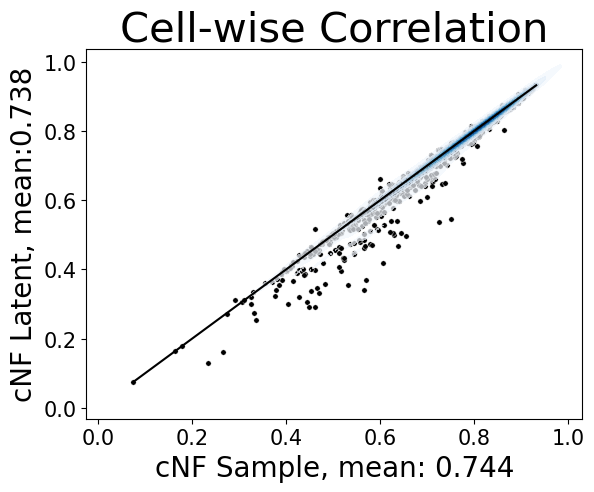

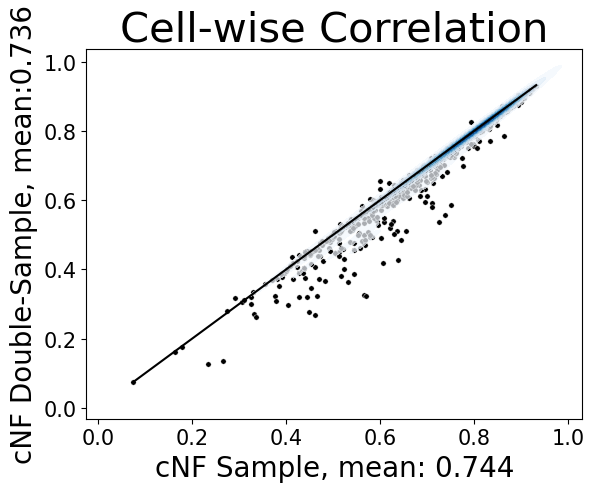

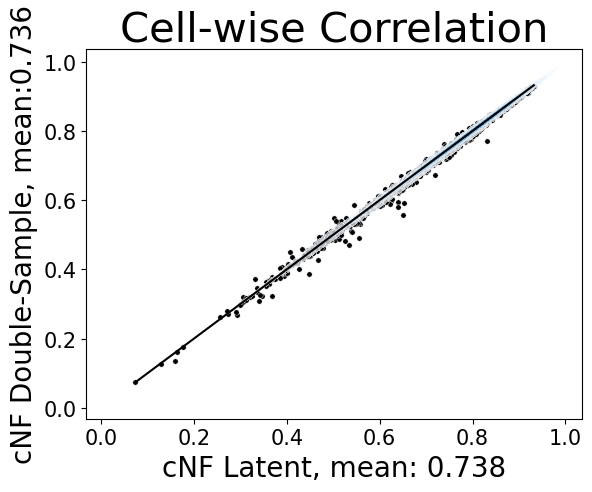

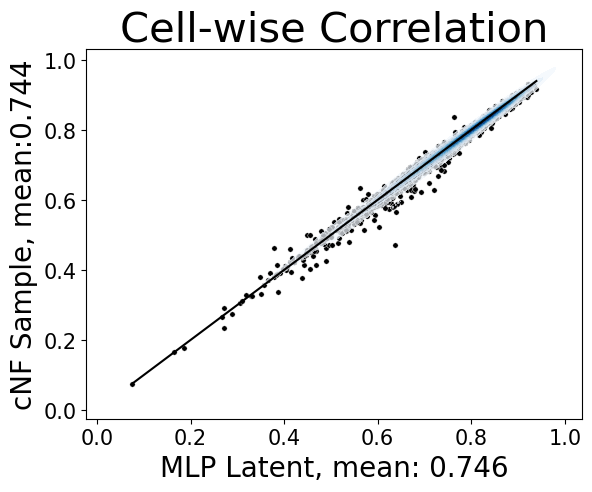

In [29]:
compare_correlations(
    x=corr_cell_list["mlp_sample"],
    y=corr_cell_list["mlp_latent"],
    title="Cell-wise Correlation",
    x_label="MLP Sample",
    y_label="MLP Latent",
    save_fig=save_figs,
    file_name="mlp_latent_sample_cell.pdf",
)
compare_correlations(
    x=corr_cell_list["sample_inn"],
    y=corr_cell_list["latent_inn"],
    title="Cell-wise Correlation",
    x_label="cNF Sample",
    y_label="cNF Latent",
    save_fig=save_figs,
    file_name="cNF_latent_sample_cell.pdf",
)
compare_correlations(
    x=corr_cell_list["sample_inn"],
    y=corr_cell_list["double_sample_inn"],
    title="Cell-wise Correlation",
    x_label="cNF Sample",
    y_label="cNF Double-Sample",
    save_fig=save_figs,
    file_name="cNF_sample_doublesample_cell.pdf",
)
compare_correlations(
    x=corr_cell_list["latent_inn"],
    y=corr_cell_list["double_sample_inn"],
    title="Cell-wise Correlation",
    x_label="cNF Latent",
    y_label="cNF Double-Sample",
    save_fig=save_figs,
    file_name="cNF_latent_doublesample_cell.pdf",
)
compare_correlations(
    x=corr_cell_list["mlp_latent"],
    y=corr_cell_list["sample_inn"],
    title="Cell-wise Correlation",
    x_label="MLP Latent",
    y_label="cNF Sample",
    save_fig=save_figs,
    file_name="mlp_latent_cNF_sample_cell.pdf",
)

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

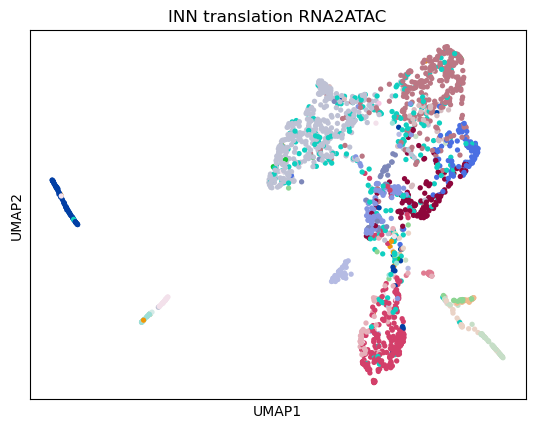

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

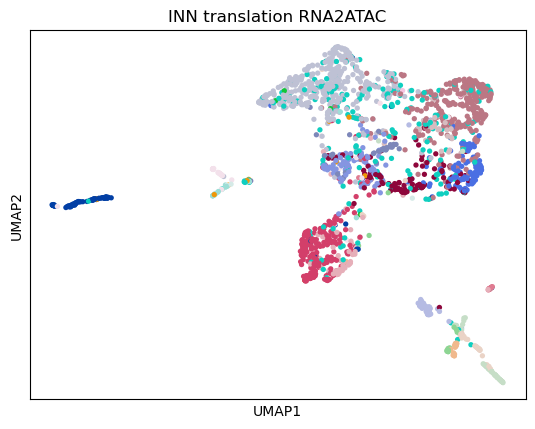

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

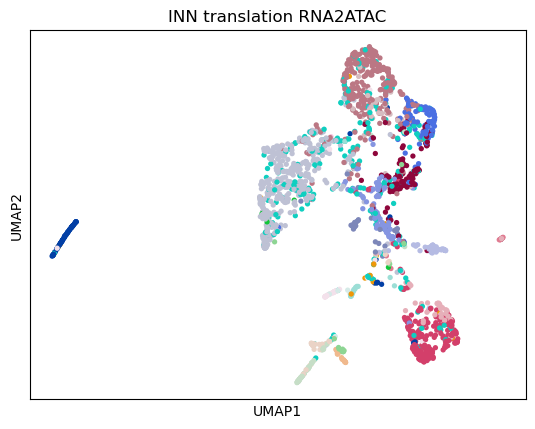

In [30]:
for i in ["doublesample_rna2atac_v1", "latent_rna2atac_v1", "sample_rna2atac_v1"]:
    reconstr_data, _ = get_reconstructed_cross_modality(f"/data/mikulik/mnt_polarbear_exp/inntranslator/{i}/")
    # pca_embed(reconstr_data, title=f"INN {i}")
    scanpy_embedding(
        reconstr_data, test_cell_names, snareseq_peaks, title="INN translation RNA2ATAC"
    )  # , latent=atac_z)

    # pearson_r_list, pearson_r_flatten, a, b = plot_cor_pergene(obs_norm[:, diff_genes_ind.tolist()],
    #                                                           reconstr_data[:, diff_genes_ind.tolist()],
    #                                                           logscale=False, normlib=False)
    # print(f"Correlation across genes: {pearson_r_flatten}")
    # sns.histplot(pearson_r_list)
    # plt.show(f"Correlation across cells for each gene, {i} (Diff expr. genes)")
    # plt.xlabel(f"mean: {pearson_r_list.mean()}")

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

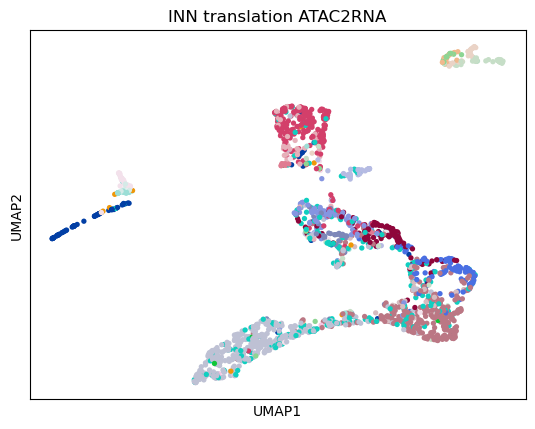

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

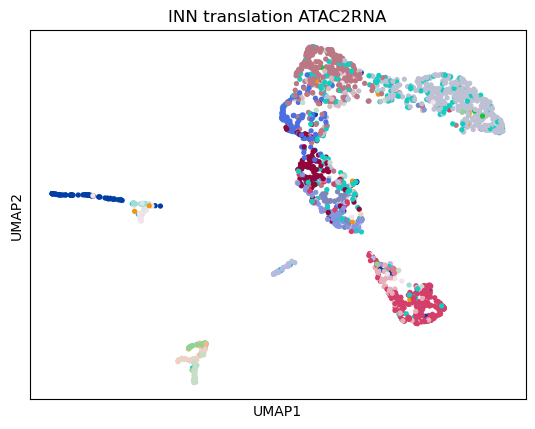

/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/mikulik/miniconda3/envs/polar/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The defaul

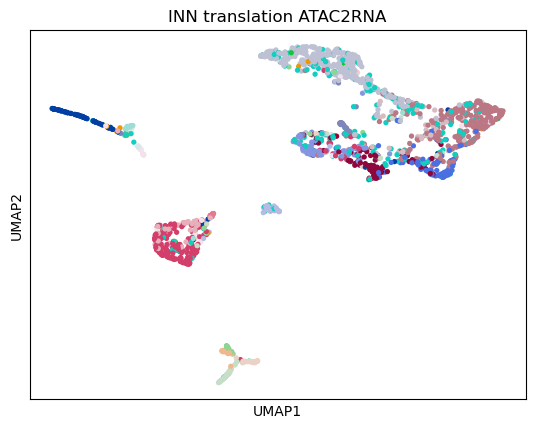

In [31]:
for i in ["doublesample_atac2rna_v1", "latent_atac2rna_v1", "sample_atac2rna_v1"]:
    reconstr_data, _ = get_reconstructed_cross_modality(f"/data/mikulik/mnt_polarbear_exp/inntranslator/{i}/")
    # pca_embed(reconstr_data, title=f"INN {i}")
    scanpy_embedding(reconstr_data, test_cell_names, gene_names, title="INN translation ATAC2RNA")  # , latent=atac_z)

    # pearson_r_list, pearson_r_flatten, a, b = plot_cor_pergene(obs_norm[:, diff_genes_ind.tolist()],
    #                                                           reconstr_data[:, diff_genes_ind.tolist()],
    #                                                           logscale=False, normlib=False)
    # print(f"Correlation across genes: {pearson_r_flatten}")
    # sns.histplot(pearson_r_list)
    # plt.show(f"Correlation across cells for each gene, {i} (Diff expr. genes)")
    # plt.xlabel(f"mean: {pearson_r_list.mean()}")